In [884]:
from sklearn.datasets.base import Bunch
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from imutils import paths
from scipy import io
import numpy as np
import random
import imutils
import cv2

In [885]:
def load_sunplusit_faces(datasetPath, min_faces=10, face_size=(47, 62), equal_samples=True,
	test_size=0.33, seed=42, flatten=False):
	imagePaths = sorted(list(paths.list_images(datasetPath)))

	# set the random seed, then initialize the data matrix and labels
	random.seed(seed)
	data = []
	labels = []

	# loop over the image paths
	for (i, imagePath) in enumerate(imagePaths):
		# load the image and convert it to grayscale
		print(imagePath)
		face = cv2.imread(imagePath)
		face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
		face = cv2.resize(face, face_size)

		# check to see if the face should be flattened into a single row
		if flatten:
			face = face.flatten()

		# update the data matrix and associated labels
		data.append(face)
		labels.append(imagePath.split("/")[-2])

	print(labels)
	# convert the data matrix and labels list to a NumPy array
	data = np.array(data)
	labels = np.array(labels)

	# # check to see if equal samples for each face should be used
	if equal_samples:
		# initialize the list of sampled indexes
		sampledIdxs = []

		# loop over the unique labels
		for label in np.unique(labels):
			# grab the indexes into the labels array where labels equals the current
			# label
			labelIdxs = np.where(labels == label)[0]

			# only proceed if the required number of minimum faces can be met
			if len(labelIdxs) >= min_faces:
				# randomly sample the indexes for the current label, keeping only minumum
				# supplied amount, then update the list of sampled idnexes
				labelIdxs = random.sample(list(labelIdxs), min_faces)
				sampledIdxs.extend(labelIdxs)

		# use the sampled indexes to select the appropriate data points and labels
		random.shuffle(sampledIdxs)
		data = data[sampledIdxs]
		labels = labels[sampledIdxs]

	# compute the training and testing split index
	idxs = range(0, len(data))
	random.shuffle(list(idxs))
	split = int(len(idxs) * (1.0 - test_size))

	# split the data into training and testing segments
	(trainData, testData) = (data[:split], data[split:])
	(trainLabels, testLabels) = (labels[:split], labels[split:])

	# create the training and testing bunches
	training = Bunch(name="training", data=trainData, target=trainLabels)
	testing = Bunch(name="testing", data=testData, target=testLabels)

	# return a tuple of the training, testing bunches, and original labels
	return (training, testing, labels)        

In [886]:
def load_caltech_faces(datasetPath, min_faces=10, face_size=(47, 62), equal_samples=True,
	test_size=0.33, seed=42, flatten=False):
	# grab the image paths associated with the faces, then load the bounding box data
	imagePaths = sorted(list(paths.list_images(datasetPath)))
	bbData = io.loadmat("{}/ImageData.mat".format(datasetPath))
	bbData = bbData["SubDir_Data"].T

	# set the random seed, then initialize the data matrix and labels
	random.seed(seed)
	data = []
	labels = []

	# loop over the image paths
	for (i, imagePath) in enumerate(imagePaths):
		# load the image and convert it to grayscale
		image = cv2.imread(imagePath)
		gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

		# grab the bounding box associated with the current image, extract the face
		# ROI, and resize it to a canonical size
		k = int(imagePath[imagePath.rfind("_") + 1:][:4]) - 1
		(xBL, yBL, xTL, yTL, xTR, yTR, xBR, yBR) = bbData[k].astype("int")
		face = gray[yTL:yBR, xTL:xBR]
		face = cv2.resize(face, face_size)

		# check to see if the face should be flattened into a single row
		if flatten:
			face = face.flatten()

		# update the data matrix and associated labels
		data.append(face)
		labels.append(imagePath.split("/")[-2])

	# convert the data matrix and labels list to a NumPy array
	data = np.array(data)
	labels = np.array(labels)

	# # check to see if equal samples for each face should be used
	if equal_samples:
		# initialize the list of sampled indexes
		sampledIdxs = []

		# loop over the unique labels
		for label in np.unique(labels):
			# grab the indexes into the labels array where labels equals the current
			# label
			labelIdxs = np.where(labels == label)[0]

			# only proceed if the required number of minimum faces can be met
			if len(labelIdxs) >= min_faces:
				# randomly sample the indexes for the current label, keeping only minumum
				# supplied amount, then update the list of sampled idnexes
				labelIdxs = random.sample(list(labelIdxs), min_faces)
				sampledIdxs.extend(labelIdxs)

		# use the sampled indexes to select the appropriate data points and labels
		random.shuffle(sampledIdxs)
		data = data[sampledIdxs]
		labels = labels[sampledIdxs]

	# compute the training and testing split index
	idxs = range(0, len(data))
	random.shuffle(list(idxs))
	split = int(len(idxs) * (1.0 - test_size))

	# split the data into training and testing segments
	(trainData, testData) = (data[:split], data[split:])
	(trainLabels, testLabels) = (labels[:split], labels[split:])

	# create the training and testing bunches
	training = Bunch(name="training", data=trainData, target=trainLabels)
	testing = Bunch(name="testing", data=testData, target=testLabels)

	# return a tuple of the training, testing bunches, and original labels
	return (training, testing, labels)

In [887]:
#(training, testing, names) = load_caltech_faces("caltech_faces", min_faces=21, test_size=0.25)
(training, testing, names) = load_sunplusit_faces("sunplusit-faces", min_faces=7, test_size=0.25)

sunplusit-faces/albert-tsai/face-117.jpg
sunplusit-faces/albert-tsai/face-120.jpg
sunplusit-faces/albert-tsai/face-203.jpg
sunplusit-faces/albert-tsai/face-286.jpg
sunplusit-faces/albert-tsai/face-359.jpg
sunplusit-faces/albert-tsai/face-384.jpg
sunplusit-faces/albert-tsai/face-41.jpg
sunplusit-faces/albert-tsai/face-470.jpg
sunplusit-faces/albert-tsai/face-77.jpg
sunplusit-faces/amanda-liang/face-195.jpg
sunplusit-faces/amanda-liang/face-237.jpg
sunplusit-faces/amanda-liang/face-352.jpg
sunplusit-faces/amanda-liang/face-364.jpg
sunplusit-faces/amanda-liang/face-43.jpg
sunplusit-faces/amanda-liang/face-488.jpg
sunplusit-faces/ariel-lee/face-136.jpg
sunplusit-faces/ariel-lee/face-155.jpg
sunplusit-faces/ariel-lee/face-284.jpg
sunplusit-faces/ariel-lee/face-36.jpg
sunplusit-faces/ariel-lee/face-367.jpg
sunplusit-faces/ariel-lee/face-374.jpg
sunplusit-faces/ariel-lee/face-50.jpg
sunplusit-faces/ariel-lee/face-54.jpg
sunplusit-faces/ariel-lee/face-6.jpg
sunplusit-faces/by-chou/face-12.jpg


sunplusit-faces/justin-chang/face-100.jpg
sunplusit-faces/justin-chang/face-149.jpg
sunplusit-faces/justin-chang/face-159.jpg
sunplusit-faces/justin-chang/face-2.jpg
sunplusit-faces/justin-chang/face-207.jpg
sunplusit-faces/justin-chang/face-263.jpg
sunplusit-faces/justin-chang/face-277.jpg
sunplusit-faces/justin-chang/face-281.jpg
sunplusit-faces/justin-chang/face-39.jpg
sunplusit-faces/justin-chang/face-392.jpg
sunplusit-faces/justin-chang/face-403.jpg
sunplusit-faces/justin-chang/face-409.jpg
sunplusit-faces/justin-chang/face-48.jpg
sunplusit-faces/justin-chang/face-525.jpg
sunplusit-faces/justin-chang/face-534.jpg
sunplusit-faces/justin-chang/face-563.jpg
sunplusit-faces/justin-chang/face-565.jpg
sunplusit-faces/justin-chang/face-588.jpg
sunplusit-faces/justin-chang/face-7.jpg
sunplusit-faces/justin-chang/face-833.jpg
sunplusit-faces/justin-chang/face-84.jpg
sunplusit-faces/justin-chang/face-945.jpg
sunplusit-faces/justin-chang/face-98.jpg
sunplusit-faces/ken-lin/face-100.jpg
sunpl

In [888]:
# encode the labels, transforming them from strings into integers since OpenCV does
# not like strings as training data
le = LabelEncoder()
le.fit_transform(training.target)

array([ 3,  6, 16, 20, 10, 16,  5, 18, 21, 12,  1, 22,  5,  5, 22, 21,  5,
       11,  2, 21,  6, 18,  7, 15,  8, 13, 19, 16,  5, 16,  0, 21,  4, 14,
        7, 15,  9,  9, 12, 14, 14,  2, 19, 21,  6, 10, 17, 15,  0,  3, 22,
       20, 20,  3,  1,  2, 10,  6,  0, 17,  7,  4,  5, 15, 13,  8, 19, 11,
       18, 15,  3, 12, 21, 18,  9, 10, 13, 13,  1,  6, 19, 16, 14, 11, 11,
        0,  8, 20, 22,  6,  7, 12, 13,  1,  3,  7, 14,  4,  8, 14, 10, 22,
       18,  9,  3,  8, 12,  5, 18,  9, 17, 20, 15,  0,  1, 17,  1, 11, 12,
        1])

In [889]:
# handle if we are creating the LBP face recognizer for OpenCV 2.4
#if imutils.is_cv2():
#	recognizer = cv2.LBPHFaceRecognizer_create(radius=2, neighbors=16, grid_x=8, grid_y=8)

# otherwise, we are creating the LBP face recognizer for OpenCV 3
#else:
recognizer = cv2.face.LBPHFaceRecognizer_create(radius=2, neighbors=16, grid_x=8, grid_y=8)
#recognizer = cv2.face.EigenFaceRecognizer_create()

In [890]:
# train the Local Binary Pattern face recognizer
print("[INFO] training face recognizer...")
recognizer.train(training.data, le.transform(training.target))

[INFO] training face recognizer...


In [891]:
# initialize the list of predictions and confidence scores
print("[INFO] gathering predictions...")
predictions = []
confidence = []

[INFO] gathering predictions...


In [892]:
# loop over the test data
for i in range(0, len(testing.data)):
	print("{} of {}".format(str(i), str(len(testing.data))))
	# classify the face and update the list of predictions and confidence scores
	(prediction, conf) = recognizer.predict(testing.data[i])
	predictions.append(prediction)
	confidence.append(conf)

0 of 41
1 of 41
2 of 41
3 of 41
4 of 41
5 of 41
6 of 41
7 of 41
8 of 41
9 of 41
10 of 41
11 of 41
12 of 41
13 of 41
14 of 41
15 of 41
16 of 41
17 of 41
18 of 41
19 of 41
20 of 41
21 of 41
22 of 41
23 of 41
24 of 41
25 of 41
26 of 41
27 of 41
28 of 41
29 of 41
30 of 41
31 of 41
32 of 41
33 of 41
34 of 41
35 of 41
36 of 41
37 of 41
38 of 41
39 of 41
40 of 41


In [893]:
# show the classification report
print(classification_report(le.transform(testing.target), predictions,
	target_names=np.unique(names)))

                precision    recall  f1-score   support

   albert-tsai       0.40      1.00      0.57         2
     ariel-lee       0.00      0.00      0.00         0
       by-chou       1.00      0.25      0.40         4
      carol-yu       0.20      1.00      0.33         1
       ch-kung       1.00      0.50      0.67         4
     daniel-li       0.00      0.00      0.00         0
    evan-cheng       0.00      0.00      0.00         1
      gt-hsiao       0.00      0.00      0.00         2
     hana-pang       1.00      1.00      1.00         2
    janice-lin       1.00      1.00      1.00         2
     jim-chang       0.50      0.50      0.50         2
    joe-chuang       0.00      0.00      0.00         2
      joe-sheu       1.00      1.00      1.00         1
  justin-chang       0.00      0.00      0.00         2
       ken-lin       1.00      1.00      1.00         1
        kw-lin       0.33      1.00      0.50         1
michelle-chang       1.00      1.00      1.00  

/home/chtseng/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/chtseng/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


/home/chtseng/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/chtseng/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/chtseng/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/chtseng/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

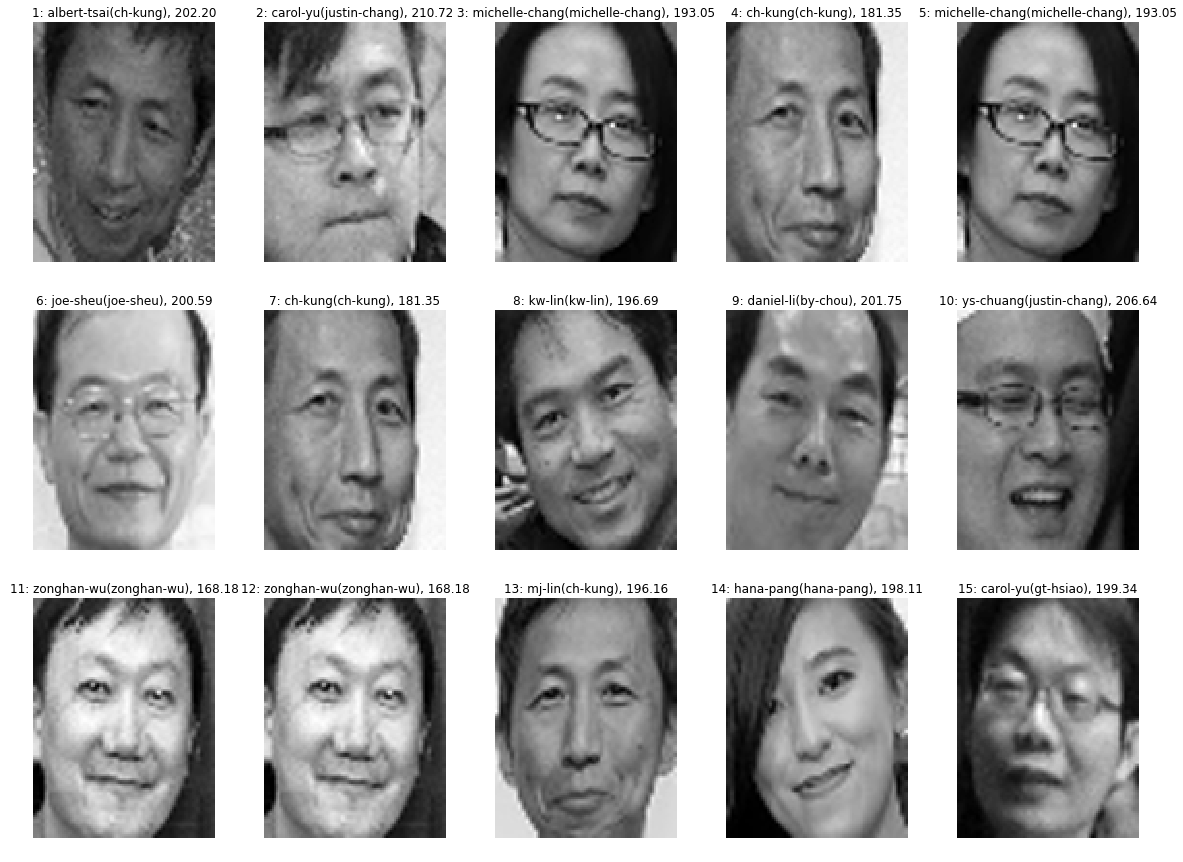

In [894]:
from matplotlib import pyplot as plt
# Plot inline
%matplotlib inline

w=10
h=50
ii=1
fig=plt.figure(figsize=(20, 15))
columns = 5
rows = 3

# loop over the the desired number of samples
for i in np.random.randint(0, high=len(testing.data), size=columns*rows):
	# resize the face to make it more visable, then display the face and the prediction

	title = ("{}: {}({}), {:.2f}".format(
		ii, le.inverse_transform(predictions[i]), testing.target[i], confidence[i]))
	face = testing.data[i]
	face = imutils.resize(face, width=face.shape[1] * 2, inter=cv2.INTER_CUBIC)
	#image = mpimg.imread(face)
	fig.add_subplot(rows, columns, ii)
	plt.axis("off")    
	plt.title(title)
	plt.imshow(face, cmap="gray")
	ii+=1
    
plt.show()

In [963]:
import glob
from matplotlib import pyplot as plt
# Plot inline
%matplotlib inline

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
#face_cascade = cv2.CascadeClassifier('lbpcascade_frontalface.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

In [978]:
def putText(image, text, x, y, color=(255,255,255), thickness=1, size=1.3):
	if x is not None and y is not None:
		cv2.putText( image, text, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, size, color, thickness)
	return image

In [988]:
testimg = "dataset/facetest/DSC_5113.jpg"
face_size = (47, 62)

In [989]:
print("Load {} ..."+testimg)
    
img = cv2.imread(testimg)
r = 2048.0 / img.shape[1]
dim = (2048, int(img.shape[0] * r))
img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

b,g ,r = cv2.split(img)
img = cv2.merge([r,g,b])

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(
	gray,
	scaleFactor= 1.1,
	minNeighbors=8,
	minSize=(47, 62),
	flags=cv2.CASCADE_SCALE_IMAGE
)


for (x,y,w,h) in faces:
	cv2.rectangle(img,(x,y),(x+w,y+h),(6,6,255),2)
	roi_gray = gray[y:y+h, x:x+w]
	face = cv2.resize(roi_gray, face_size)
    
	roi_color = img[y:y+h, x:x+w]
    
	#cv.imwrite(savePath+"/face-"+str(i)+".jpg", roi_color)
    
	(prediction, conf) = recognizer.predict(face)
	namePredict = le.inverse_transform(prediction)
	print(namePredict, conf)
	#putText(img, namePredict+"["+str(int(conf))+"]", x, y, (255,35,35), thickness=5, size=1)
	putText(img, namePredict, x, y, (255,35,35), thickness=4, size=1.6)  
	i += 1

Load {} ...dataset/facetest/DSC_5113.jpg


/home/chtseng/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


joe-chuang 176.34655455325125


/home/chtseng/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


ray-hsu 196.65514989263534


/home/chtseng/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


michelle-chang 213.43586437079244


/home/chtseng/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


mj-lin 196.17839999365688


/home/chtseng/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


hana-pang 186.18667217281453


/home/chtseng/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


joe-chuang 200.553156995847


/home/chtseng/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


joe-chuang 198.12564344209028
mj-lin 201.49817523691505


/home/chtseng/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


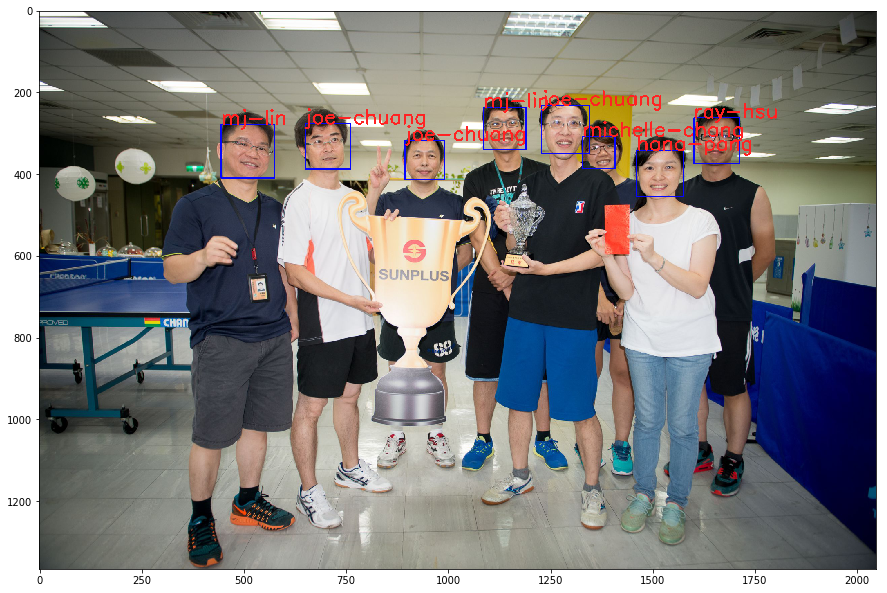

In [990]:
plt.figure(figsize=(15, 12))

plt.imshow(img)